## 03 - Challenge Data Analyst - NeuralWorks 

Postulante: Ignacio Tapia  
Diciembre 2022

____________


## Instrucciones
- Debes entregar tu solución en un repositorio GitHub
- En el repositorio deben estar todos los archivos utilizados para la resolución de tu desafío.
- La solución debe estar implementada en Python y SQL, indicando claramente la pregunta que estás
resolviendo. No serán revisados otros lenguajes como R o similar.
- Recuerda que no estamos en tu cabeza! Escribe los supuestos que estás asumiendo.
- Para este desafío te recomendamos que describas claramente cómo mejorar cada parte de tu ejercicio en
caso de que tenga opción de mejora.
- Debes enviar el link al repositorio vía mail a ***** contestando el correo en el que se te
envió este enunciado.


## Problema
NeuralWorks en su constante búsqueda por realizar proyectos entretenidos ha decidido explorar patrones para armar el mejor equipo de fútbol posible. Hemos conseguido datos con más de 25,000 partidos y 10,000 jugadores de la FIFA entre 2008 y 2016. Para crear al mejor equipo, ¡necesitamos de tu ayuda cómo Data Analyst! Tu misión consiste en:
1. Adjunto va un archivo .sqlite, comienza por crear una base de datos con este archivo y familiarízate con la data.
2. Las tablas de Match, League, Country y Team tiene toda la información para describir un partido detalladamente. Crea una query SQL para obtener la información detallada por partido uniendo las tablas Match, League, Country y Team.
3. ¿Qué insights ves en la información detallada del partido?
4. Dado que queremos armar un equipo maravilloso nos interesa tener un perfil por cada jugador. Ocupa SQL
y/o Python para crear un Dataframe que tenga un jugador por fila con toda la información que creas
relevante
5. ¿Qué insights ves en el perfil por jugador? ¿Qué data crees que es relevante para elegir a los mejores
jugadores?  

BONUS: ¿Cuál es tu sugerencia de jugadores para armar el mejor equipo de la historia? Argumenta tu respuesta.

__________


### Preámbulo

In [1]:
# Definir Directorio de Trabajo
import os

if os.getcwd().split('/')[-1] != 'challenge_neuralworks':
    os.chdir('../')

# Librerías Principales
import sqlite3
import pandas as pd
import numpy as np
from tqdm import tqdm

# Funciones Adhoc al proyecto
from utils import database as db
from utils.general_functions import final_result, get_playing_system


# Librerías Para Visualización
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns


# Ajustes Generales
sns.set_theme()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Carga de Datos


**2. Las tablas de Match, League, Country y Team tiene toda la información para describir un partido detalladamente. Crea una query SQL para obtener la información detallada por partido uniendo las tablas Match, League, Country y Team.**

La base de datos llamada "dabaste.sql" se encuentra ubicada en la ruta `challenge_neuralworks/data/database.sqlite`. Para cargar los datos en formato `pandas.DataFrame` se hace uso una función personalizada ubicada en el directorio `challenge_neuralworks/utils` importada en el preámbulo de este documento. 

La función personalizada `db.read_from_sqlite()` invoca una consulta sql almacenada en en un archivo .sql ubicado en el directorio `challenge_neuralworks/queries/select`

In [2]:
# Importar datos
df_match = db.read_from_sqlite(sql_file='queries/select/matches.sql', path_db='data/database.sqlite')
df_player = db.read_from_sqlite(sql_file='queries/select/players-attributes-season.sql', path_db='data/database.sqlite')
df_player_overall_rating = db.read_from_sqlite(sql_file='queries/select/historical_mean_overall_rating.sql', path_db='data/database.sqlite')

# La consulta sql generó columnas duplicadas. Estas columnas se eliminan a continuación.
df_player = df_player.loc[:,~df_player.columns.duplicated()]

In [3]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league_name,country_name,home_team_long_name,home_team_short_name,away_team_long_name,away_team_short_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,Belgium Jupiler League,Belgium,KRC Genk,GEN,Beerschot AC,BAC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,Belgium Jupiler League,Belgium,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,Belgium Jupiler League,Belgium,KSV Cercle Brugge,CEB,RSC Anderlecht,AND
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,Belgium Jupiler League,Belgium,KAA Gent,GEN,RAEC Mons,MON
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Análisis Exploratorio y Feature Engineer

**3. ¿Qué insights ves en la información detallada del partido?**

Para acotar el análisis de la base de datos y proponer una metodología interesante que permita conformar al mejor equipo, se utilizarán las siguiente variables:

|VARIABLES ORIGINALES|DESCRIPCIÓN|
|--|--|
|`id`|Identificador único de cada juego (match)|
|`league_id`|Identificador de la liga al que pertenece el juego|
|`season`|Temprada (año_inicio/año_termino)|
|`home_team_goal`|Goles válidos marcados por el equipo local|
|`away_team_goal`|Goles válidos marcados por el equipo visitante|
|`home_player_X{i}`|Ubicación del jugador i del equipo local en el **eje X** (Plano Cartesiano equivale al campo de juego)|
|`away_player_X{i}`|Ubicación del jugador i del equipo visitante en el **eje X** (Plano Cartesiano equivale al campo de juego)|
|`home_player_Y{i}`|Ubicación del jugador i del equipo local en el **eje Y** (Plano Cartesiano equivale al campo de juego)|
|`away_player_Y{i}`|Ubicación del jugador i del equipo visitante en el **eje Y** (Plano Cartesiano equivale al campo de juego)|
|`home_player_{i}`|Identificadot único del jugador titular i perteneciente al equipo local|
|`away_player_{i}`|Identificadot único del jugador titular i perteneciente al equipo visitante|


<br>
Además, a partir de estas variables, se construiran los siguientes atributos que ayudarán a mejorar la especificidad del análisis y posterior propuesta de mejor equipo.
<br>
<br>

|VARIABLES GENERADAS|DESCRIPCIÓN|CONSTRUCCIÓN|
|--|--|--|
|`final_result`|Resultado Final. H:Gana Equipo Local, D:Empate y A:Gana el Equipo Visitante|A partir de función personalizada `final_result()` ubicada en utils.general_function|
|`home_points`|Puntos obtenidos por el equipo Local (3:gana, 1:empate, 0:pierde)|Método `.map()`de `pandas.Series`|
|`away_points`|Puntos obtenidos por el equipo Visitante (3:gana, 1:empate, 0:pierde)|Método `.map()`de `pandas.Series`|
|`home_playing_sys`|Sistema de juego del Equipo Local (Ej: 1-4-4-2)|A partir de función personalizada `get_playing_system()` ubicada en utils.general_function|
|`away_playing_sys`|Sistema de juego del Equipo Visitante (Ej: 1-4-4-2)|A partir de función personalizada `get_playing_system()` ubicada en utils.general_function|

In [4]:
# Generar Variable final_result
df_match['final_result'] = df_match.apply(lambda x: final_result(x['home_team_goal'], x['away_team_goal']), axis=1)

# Generar Variables home_points y away_points
df_match['home_points'] = df_match['final_result'].map({'H':3, 'D':1, 'A':0})
df_match['away_points'] = df_match['final_result'].map({'H':0, 'D':1, 'A':3})

<br>
Para los sistemas de juego, primero se corrige la ubicación (X,Y) del jugador número 1 de ambos equipos. Esto debido a que, originalmente la ubicación del juegador 1 (Arquero), se encuentra en (X=1,Y=1), lo cual dificultará la visualización del sistema de juego (disposición de los equipos al comenzar el partido). Para ello, se reubica al arquero (jugador 1 de ambos equipos) en las coordenadas (X=5,Y=1).

In [5]:
df_match[['home_player_X1', 'home_player_Y1']][~df_match['home_player_X1'].isnull()].head()

,home_player_X1,home_player_Y1
144,1.0,1.0
145,1.0,1.0
146,1.0,1.0
147,1.0,1.0
148,1.0,1.0


In [6]:
# Reubicación del arquero en coordenadas (5,1)
df_match['home_player_X1'] = 5.0
df_match['home_player_Y1'] = 1.0
df_match['away_player_X1'] = 5.0
df_match['away_player_Y1'] = 1.0

# Obtener sistemas de juego
df_match['home_playing_sys'] = df_match.iloc[:,33:44].apply(get_playing_system, axis=1)
df_match['away_playing_sys'] = df_match.iloc[:,44:55].apply(get_playing_system, axis=1)

A continuación se despliegan los 3 sistemas de juego más frecuentes:

In [7]:
print('\nTOP-3 Sistemas de juego preferidos por equipos locales')
df_match['home_playing_sys'].value_counts(1)[:3]


TOP-3 Sistemas de juego preferidos por equipos locales


1-4-2-3-1    0.266360
1-4-4-2      0.266112
1-4-3-3      0.181163
Name: home_playing_sys, dtype: float64

In [8]:
print('\nTOP-3 Sistemas de juego preferidos por equipos visitantes')
df_match['away_playing_sys'].value_counts(1)[:3]


TOP-3 Sistemas de juego preferidos por equipos visitantes


1-4-2-3-1    0.267357
1-4-4-2      0.251781
1-4-3-3      0.180365
Name: away_playing_sys, dtype: float64

<br>  
Los sistemas de juego preferidos, tanto por equipos locales como visitantes, son el 1-4-2-3-1, 1-4-4-2 y el 1-4-3-3. Para entender mejor como se despliegan estos sistemas en el campo de juego, se visualizan a continuación:

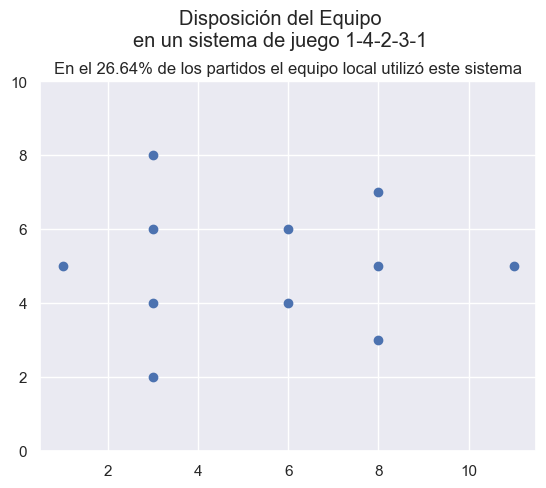

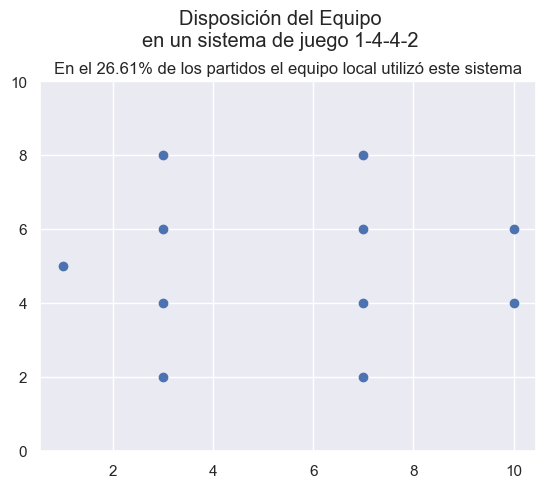

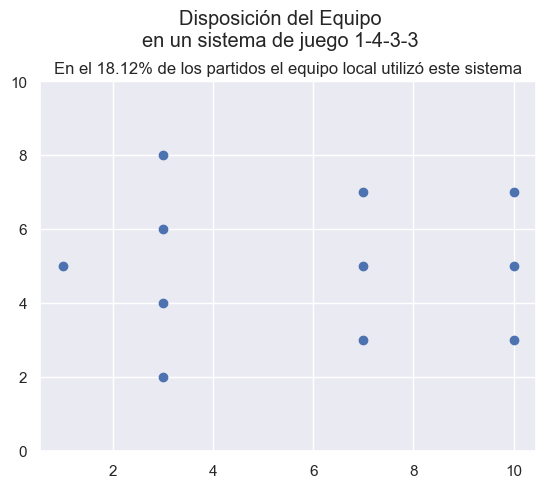

In [9]:
ply_sys_frequency = df_match['home_playing_sys'].value_counts(1)[:3]

for ply_sys in ply_sys_frequency.index:
        
    ply_sys_index = df_match[df_match['home_playing_sys'] == ply_sys].index[5]
    
    pos_x = df_match.iloc[ply_sys_index,22:33]
    pos_y = df_match.iloc[ply_sys_index,44:55]
    
    plt.scatter(pos_y, pos_x)
    plt.suptitle(f'Disposición del Equipo\nen un sistema de juego {ply_sys}', y=1.03)
    plt.title(f'En el {round(ply_sys_frequency[ply_sys] * 100,2)}% de los partidos el equipo local utilizó este sistema')
    plt.ylim((0,10))
    plt.show()

Estos sistemas de juego son los más utilizados durante el periodo 2008/2016, ¿Pero esta frecuencia se mantiene consistente a lo largo del periodo? Para corroborar esto, se analizar el comportamiento de los sistemas de juego añadiendo la dimensión temporal `season`.

In [10]:
# Obtener Top-3 Sistemas de juego para cada equipo (Local y Visitante)
top_3_home_ply_sys = df_match.groupby(['home_playing_sys'])[['id']].count().sort_values(by='id',ascending=False)[:3]
top_3_away_ply_sys = df_match.groupby(['away_playing_sys'])[['id']].count().sort_values(by='id',ascending=False)[:3]

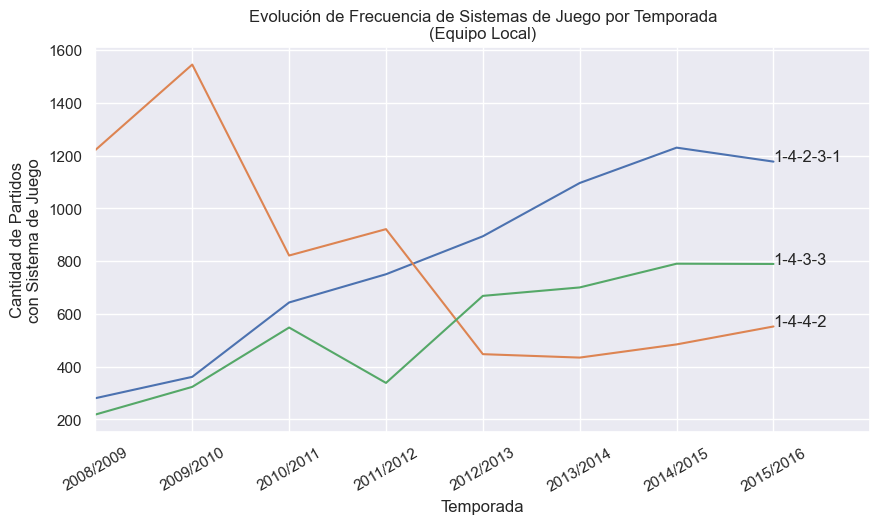

In [11]:
# Visualizar evolución de los sitemas de juego a lo largo del tiempo
plt.figure(figsize=(10,5))
for ply_sys in top_3_home_ply_sys.index:
    
    # Obtener DataFrame Temporal sólo con los partidos dónde el equipo local utilizó el sistema.
    df_temp = df_match[df_match['home_playing_sys'] == ply_sys]
    
    # Agrupar datos por temprada (season)
    df_temp = df_temp.groupby('season').count()['id'].reset_index()
    
    # Visualizar
    plt.plot(df_temp['season'], df_temp['id'])
    plt.xlim(0,8)
    plt.xticks(rotation=30)
    
    # Añadir nota del sistema de juego al final de cada serie.
    x_annotate = len(df_temp['season'])
    y_annotate = list(df_temp['id'])[-1]
    plt.annotate(text=ply_sys, xy=(x_annotate-1,y_annotate))

# Identificación de ejes
plt.title('Evolución de Frecuencia de Sistemas de Juego por Temporada\n(Equipo Local)')
plt.ylabel('Cantidad de Partidos\ncon Sistema de Juego')
plt.xlabel('Temporada')
plt.show()

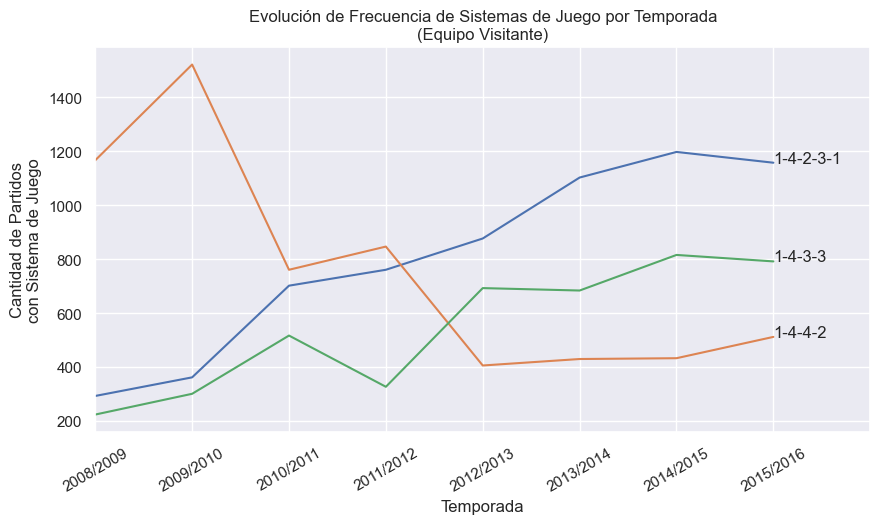

In [12]:
# Visualizar evolución de los sitemas de juego a lo largo del tiempo
plt.figure(figsize=(10,5))
for ply_sys in top_3_away_ply_sys.index:
    
    # Obtener DataFrame Temporal sólo con los partidos dónde el equipo visitante utilizó el sistema.
    df_temp = df_match[df_match['away_playing_sys'] == ply_sys]
    
    # Agrupar datos por temprada (season)
    df_temp = df_temp.groupby('season').count()['id'].reset_index()
    
    # Visualizar
    plt.plot(df_temp['season'], df_temp['id'])
    plt.xlim(0,8)
    plt.xticks(rotation=30)
    
    # Añadir nota del sistema de juego al final de cada serie.
    x_annotate = len(df_temp['season'])
    y_annotate = list(df_temp['id'])[-1]
    plt.annotate(text=ply_sys, xy=(x_annotate-1,y_annotate))

# Identificación de ejes
plt.title('Evolución de Frecuencia de Sistemas de Juego por Temporada\n(Equipo Visitante)')
plt.ylabel('Cantidad de Partidos\ncon Sistema de Juego')
plt.xlabel('Temporada')
plt.show()

Los gráficos de evolución de sistemas de juego a lo largo de la temporada muestran dos apectos interesantes:
1. Como vimos en análisis precedente, el sistema táctico preferido por los equipos es el 1-4-2-3-1, sin embargo, previo al 2011, el sistema preferido era el 4-4-2, cuestión que se invirtió, intuyo, que a contar del Copa Mundial del 2010. En términos puramente tácticos, la utilización de un sólo delantero, permite al equipo poblar con mayor número de jugador el medio campo, lugar donde transcurre la mayor parte del juego.
2. El comportamiento es similar entre equipos locales y visitantes.

Tenemos la frecuencia de los sistemas y la evolución de estos, pero aún no se puede determinar cuál es el mejor sistema táctico. Para ello se utilizan los puntos obtenidos por cada equipo (local y visitante) (rendimiento o performance) con cada uno de los sistemas tácticos analizados.

In [13]:
# Calcular los puntos obtenidos por cada sistema de juego en cada una de las temporada
df_home_points = df_match.groupby(['season','home_playing_sys'])['home_points']\
    .agg(['count','sum'])\
    .query('home_playing_sys in ["1-4-2-3-1", "1-4-4-2", "1-4-3-3"]')


# Para calcular performance se utiliza el ratio puntos_obtenidos/puntos potenciales
# Los potenciales equivalen a obtener 3 puntos en todos los partidos, es decir, ganarlos todos.
df_home_points['potencial_points'] = df_home_points['count'] * 3
df_home_points['performance'] = df_home_points['sum'] / df_home_points['potencial_points']
df_home_points.reset_index(inplace=True)

df_home_points.rename({'count':'cantidad_partido', 'sum':'puntos_obtenidos'}, inplace=True)

df_home_points.head()

,season,home_playing_sys,count,sum,potencial_points,performance
0,2008/2009,1-4-2-3-1,280,427,840,0.508333
1,2008/2009,1-4-3-3,218,386,654,0.590214
2,2008/2009,1-4-4-2,1221,2007,3663,0.547912
3,2009/2010,1-4-2-3-1,361,581,1083,0.536473
4,2009/2010,1-4-3-3,323,578,969,0.596491


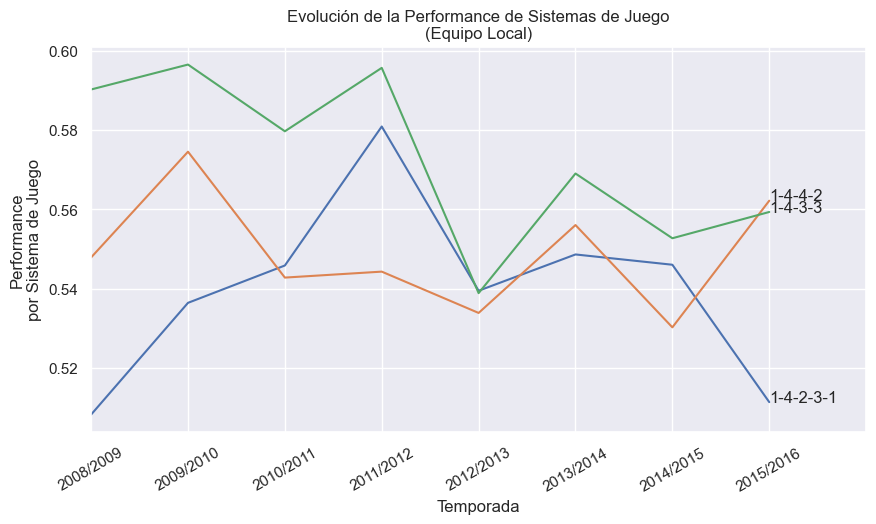

In [14]:
plt.figure(figsize=(10,5))
for ply_sys in ["1-4-2-3-1", "1-4-4-2", "1-4-3-3"]:

    df_temp = df_home_points[df_home_points['home_playing_sys'] == ply_sys]

    plt.plot(df_temp['season'], df_temp['performance'])
    plt.xlim(0,8)
    plt.xticks(rotation=30)
    
    x_annotate = len(df_temp['season'])
    y_annotate = list(df_temp['performance'])[-1]
    
    plt.annotate(text=ply_sys, xy=(x_annotate-1,y_annotate))

plt.title('Evolución de la Performance de Sistemas de Juego\n(Equipo Local)')
plt.ylabel('Performance\npor Sistema de Juego')
plt.xlabel('Temporada')
plt.show()

Ahora para el equipo visitante:

In [15]:
# Calcular los puntos obtenidos por cada sistema de juego en cada una de las temporada
df_away_points = df_match.groupby(['season','away_playing_sys'])['away_points']\
    .agg(['count','sum'])\
    .query('away_playing_sys in ["1-4-2-3-1", "1-4-4-2", "1-4-3-3"]')

# Para calcular performance se utiliza el ratio puntos_obtenidos/puntos potenciales
# Los potenciales equivalen a obtener 3 puntos en todos los partidos, es decir, ganarlos todos.
df_away_points['potencial_points'] = df_away_points['count'] * 3
df_away_points['performance'] = df_away_points['sum'] / df_away_points['potencial_points']
df_away_points.reset_index(inplace=True)

df_away_points.head()

,season,away_playing_sys,count,sum,potencial_points,performance
0,2008/2009,1-4-2-3-1,293,275,879,0.312856
1,2008/2009,1-4-3-3,224,300,672,0.446429
2,2008/2009,1-4-4-2,1167,1325,3501,0.378463
3,2009/2010,1-4-2-3-1,362,337,1086,0.310313
4,2009/2010,1-4-3-3,301,374,903,0.414175


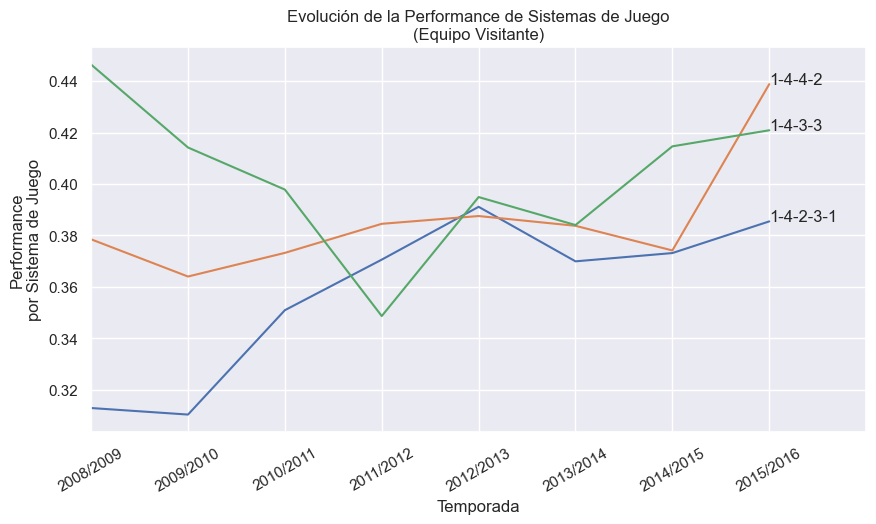

In [16]:
plt.figure(figsize=(10,5))
for ply_sys in ["1-4-2-3-1", "1-4-4-2", "1-4-3-3"]:

    df_temp = df_away_points[df_away_points['away_playing_sys'] == ply_sys]

    plt.plot(df_temp['season'], df_temp['performance'])
    plt.xlim(0,8)
    plt.xticks(rotation=30)
    
    x_annotate = len(df_temp['season'])
    y_annotate = list(df_temp['performance'])[-1]
    
    plt.annotate(text=ply_sys, xy=(x_annotate-1,y_annotate))

plt.title('Evolución de la Performance de Sistemas de Juego\n(Equipo Visitante)')
plt.ylabel('Performance\npor Sistema de Juego')
plt.xlabel('Temporada')
plt.show()

De los gráficos de performance se desprenden dos grandes conclusiones:
1. Para los sistemas tácticos analizados, la performance del equipo local es, en promedio, mayor que el rendimiento de los equipos visitantes (ver eje Y de cada gráfico).
2. Pareciera ser que, consistentemente a lo largo del tiempo, el sistema táctico 1-4-3-3 tiene un mejor performance que el resto de sistemas. Esto es interesante, dado que, de los análisis precedentes, se puede observar que el 1-4-3-3 nunca es el sistema táctico más utilizado.

Pero basarse solamente en el material gráfico para llegar a esta conclusión no es lo más adecuado. Para corroborar esto de forma estadísitca, se realiza un prueba de diferencia de medias (t-test) entre los sistemas. Las hipótesis que se quieren corroborar son las siguientes:

$$H_{01}:\mu_{1-4-3-3} \leq \mu_{1-4-2-3-1}$$
$$H_{02}:\mu_{1-4-3-3} \leq \mu_{1-4-4-2}$$

En términos sencillos, se pretende rechazar las hipótesis nulas 1 y 2, de que el promedio de rendimiento del sistema táctico 1-4-3-3 es menor que 1-4-2-3-1 y 1-4-4-2 respectivamente. Para ello utilizaremos, convenientemente, un $\alpha$ = 0.1 para rechazar la $H_{01}$

In [17]:
# Calcular performance en cada partido (independiente de la temporada)
df_full_points = df_match.groupby(['home_playing_sys'])['home_points']\
    .agg(['count','sum'])\
    .query('home_playing_sys in ["1-4-2-3-1", "1-4-4-2", "1-4-3-3"]')

df_full_points = df_match[['home_playing_sys', 'home_points']].copy(deep=True)
df_full_points['potencial_points'] = 3
df_full_points['performance'] = df_full_points['home_points'] / df_full_points['potencial_points']
df_full_points.reset_index(inplace=True)
df_full_points.head()

# Promedios de cada sistema
df_full_points.groupby('home_playing_sys')['performance']\
    .agg(['count','mean'])\
    .query('count > 1000')\
    .sort_values('mean',ascending=False)

,count,mean
home_playing_sys,,
1-4-3-3,4374,0.566225
1-4-4-2,6425,0.552633
1-4-2-3-1,6431,0.541129


Para generar una visualización de las distribuciones de las medias de cada sistema, se utiliza la técnica denominada "bootstrapping", que consiste en un muestreo aleatorio del conjunto de partidos por sistema táctico.

In [18]:
mean_preformance_storage = {
    '1-4-3-3':[],
    '1-4-4-2':[],
    '1-4-2-3-1':[]
}

for i in tqdm(range(1000)):
    
    df_temp_1_4_3_3 = df_full_points[df_full_points['home_playing_sys'] == '1-4-3-3'].sample(400)
    df_temp_1_4_4_2 = df_full_points[df_full_points['home_playing_sys'] == '1-4-4-2'].sample(400)
    df_temp_1_4_2_3_1 = df_full_points[df_full_points['home_playing_sys'] == '1-4-2-3-1'].sample(400)
    
    performance_mean_1_4_3_3 = df_temp_1_4_3_3['performance'].mean()
    performance_mean_1_4_4_2 = df_temp_1_4_4_2['performance'].mean()
    performance_mean_1_4_2_3_1 = df_temp_1_4_2_3_1['performance'].mean()
    
    mean_preformance_storage['1-4-3-3'].append(performance_mean_1_4_3_3)
    mean_preformance_storage['1-4-4-2'].append(performance_mean_1_4_4_2)
    mean_preformance_storage['1-4-2-3-1'].append(performance_mean_1_4_2_3_1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 192.45it/s]


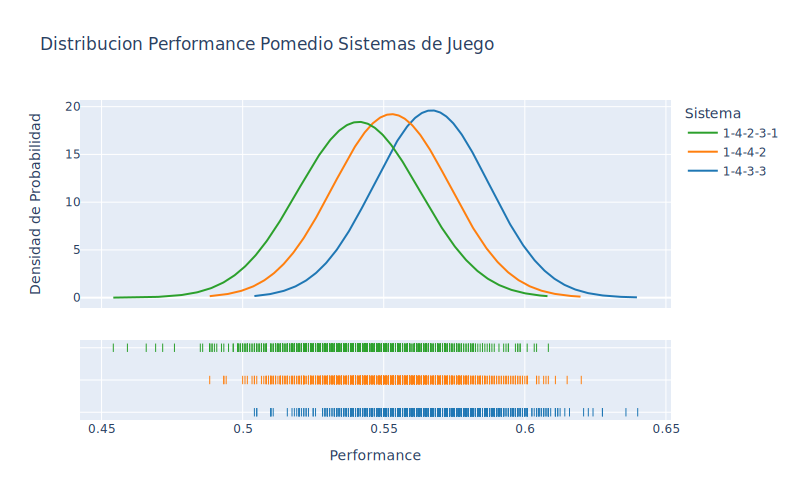

In [19]:
# Obtener datos
group_labels = list(mean_preformance_storage.keys())
hist_data = [x for x in mean_preformance_storage.values()]

# Visualización
fig = ff.create_distplot(hist_data, group_labels, show_rug=True, curve_type='normal', show_hist=False)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title=f"Distribucion Performance Pomedio Sistemas de Juego",
    xaxis_title="Performance",
    yaxis_title="Densidad de Probabilidad",
    legend_title="Sistema"
)

fig.show(renderer='svg')

El gráfico de distribuciones muestra lo que se intuyó anteriorimente, que la media del redimiento del sistema 1-4-3-3 es mayor que el resto de los sitemas.

In [20]:
from scipy.stats import ttest_ind

performance_1_4_3_3 = df_full_points[df_full_points['home_playing_sys'] == "1-4-3-3"]['performance'].reset_index(drop=True)
performance_1_4_4_2 = df_full_points[df_full_points['home_playing_sys'] == "1-4-4-2"]['performance'].reset_index(drop=True)
performance_1_4_2_3_1 = df_full_points[df_full_points['home_playing_sys'] == "1-4-2-3-1"]['performance'].reset_index(drop=True)

t_01, pvalue_01 = ttest_ind(a=performance_1_4_3_3, b=performance_1_4_4_2,alternative='greater')
t_02, pvalue_02 =  ttest_ind(a=performance_1_4_3_3, b=performance_1_4_2_3_1, alternative='greater')

print(f'H01: Performance_1_4_3_3 <= performance_1_4_4_2; (t-stat: {t_01:.3f}, p-val: {pvalue_01:.3f}) -> RH01')
print(f'H02: Performance_1_4_3_3 <= performance_1-4-2-3-1; (t-stat: {t_02:.3f}, p-val: {pvalue_02:.3f}) -> RH02')

H01: Performance_1_4_3_3 <= performance_1_4_4_2; (t-stat: 1.582, p-val: 0.057) -> RH01
H02: Performance_1_4_3_3 <= performance_1-4-2-3-1; (t-stat: 2.924, p-val: 0.002) -> RH02


<br>
En términos estadísticos, se rechaza $H_{01}$ y $H_{02}$, por lo tanto, con un nivel de confianza del 90% (p-value < 0.1), el rendimiento del sistema táctico 1-4-3-3 es, en promedio, mejor que el 1-4-4-2. Por su parte, con un nivel de confianza del 99% (p-value < 0.01) el sistema 1-4-3-3 es mejor, en promedio, que el sistema 1-4-2-3-1.

<br>
Dado que ya definimos cuál es el mejor sistema táctico, ahora se asigna a cada posición del sistema, al mejor jugador de cada una de estas.

### Análisis de Jugadores


**4. Dado que queremos armar un equipo maravilloso nos interesa tener un perfil por cada jugador. Ocupa SQL
y/o Python para crear un Dataframe que tenga un jugador por fila con toda la información que creas
relevante**


En primer lugar, a partir de la posición inicial del jugador en la cancha, se determina la posición que ocupa en el sistema táctico.

In [21]:
storage = {
    
    'player_api_id':[],
    'position':[],
    'playing_sys':[]
    
}

df_match_clean = df_match[~df_match['home_playing_sys'].isnull()].reset_index(drop=True)

for index, data in df_match_clean.iterrows():
    
    for i in range(1,12):
        
        if data[f'home_player_{i}'] > 0 :

            player = int(data[f'home_player_{i}'])
        
            position_X = int(data[f'home_player_X{i}'])
            position_Y = int(data[f'home_player_Y{i}'])
            position = (position_X,position_Y)

            playing_sys = data['home_playing_sys']
            
            storage['player_api_id'].append(player)
            storage['position'].append(position)
            storage['playing_sys'].append(playing_sys)
        
        else:
            continue

In [22]:
df_metric_players = pd.DataFrame(storage)
df_metric_players['count'] = 1
df_metric_players.head()

,player_api_id,position,playing_sys,count
0,39890,"(5, 1)",1-4-4-2,1
1,38788,"(4, 3)",1-4-4-2,1
2,38312,"(6, 3)",1-4-4-2,1
3,26235,"(8, 3)",1-4-4-2,1
4,26916,"(8, 7)",1-4-4-2,1


Por simplicidad (y tiempo), para determinar al mejor jugador, se utiliza el promedio la variable `overall` perteneciente a la tabla `Player_Attributes`. Dado que la cantidad de registros que cada jugador tiene difiere entre cada temporada, en primer lugar la query promedia el registro `overall` por temporada y luego promedia todas las temporadas para obtener la métrica histórica. 

Esto se hace para evitar sobre representar el promedio de `overall` de aquellas temporadas que contienen más registros.

La query a la cual se hace referencia se ubica en `queries/select/historical_mean_overall_rating.sql`. El resultado de la query fue cargado y almacenado en el objeto `df_player_overall_rating` en la sección **"Carga de Datos"** del presente documento.

In [23]:
df_metric_players_agg = df_metric_players.groupby(['player_api_id','position', 'playing_sys'])[['count']]\
                        .count()\
                        .sort_values('count', ascending=False)\
                        .query('count >= 10')\
                        .reset_index()

df_metric_players_agg.head()

,player_api_id,position,playing_sys,count
0,33988,"(2, 3)",1-4-3-3,104
1,35502,"(8, 3)",1-4-4-2,96
2,32657,"(5, 1)",1-4-3-3,90
3,27358,"(5, 1)",1-4-2-3-1,85
4,154257,"(5, 7)",1-4-3-3,82


In [24]:
df_metric_players_agg = df_metric_players_agg.merge(df_player_overall_rating,
                                                    left_on='player_api_id',
                                                    right_on='player_api_id',
                                                    how='left')

In [25]:
df_metric_players_agg.head()

,player_api_id,position,playing_sys,count,player_fifa_api_id,player_name,historical_mean_overall_rating
0,33988,"(2, 3)",1-4-3-3,104,146530,Daniel Alves,85.850000
1,35502,"(8, 3)",1-4-4-2,96,28178,Steven Hammell,67.558333
2,32657,"(5, 1)",1-4-3-3,90,106573,Victor Valdes,83.933333
3,27358,"(5, 1)",1-4-2-3-1,85,2196,Roman Weidenfeller,82.633333
4,154257,"(5, 7)",1-4-3-3,82,189511,Sergio Busquets,81.020370


Para entender mejor la nueva disposición de los datos se analiza el caso del jugador Wayne Rooney (`player_api_id` = 30829)

In [26]:
df_metric_players_agg.query('player_api_id == 30829').head()

,player_api_id,position,playing_sys,count,player_fifa_api_id,player_name,historical_mean_overall_rating
1295,30829,"(6, 10)",1-4-4-2,23,54050,Wayne Rooney,88.743333
1495,30829,"(5, 8)",1-4-2-3-1,21,54050,Wayne Rooney,88.743333
2652,30829,"(4, 10)",1-4-4-2,16,54050,Wayne Rooney,88.743333
3436,30829,"(5, 9)",1-4-4-1-1,14,54050,Wayne Rooney,88.743333
3674,30829,"(5, 11)",1-4-2-3-1,13,54050,Wayne Rooney,88.743333


Si observamos la primera fila de la tabla anterior, se observa que, Wayne Ronney tiene un overall rating histórico de 88.743 y ha jugado 23 veces en la posición (X=6,Y=10) en un sistema de juego 1-4-4-2.

**BONUS: ¿Cuál es tu sugerencia de jugadores para armar el mejor equipo de la historia? Argumenta tu respuesta.**

Para obtener al mejor equipo, se sigue la metodología propuesta a lo largo de este documento. Es decir, se selecciona al mejor jugador para cada posición de nuestro sistema táctico escogido (1-4-3-3)

In [27]:
# Se obtienen todas las posiciones del sistema 1-4-3-3
players_best_system = df_metric_players_agg.query('playing_sys == "1-4-3-3"')
system_coord_positions = players_best_system['position'].unique()
system_coord_positions

array([(2, 3), (5, 1), (5, 7), (3, 7), (7, 7), (4, 3), (5, 10), (8, 3),
       (3, 10), (6, 3), (7, 10)], dtype=object)

In [28]:
best_team = {
    'position':[],
    'name':[],
    'overall_rating':[]
}
for position in system_coord_positions:
    
    df_temp = players_best_system[players_best_system['position'] == position]
    
    #best_rating = df_temp['historical_mean_overall_rating'].max()
    
    best_rating = df_temp['historical_mean_overall_rating'].sort_values(ascending=False).reset_index(drop=True)[0]
    
    best_player_name = df_temp[df_temp['historical_mean_overall_rating'] == best_rating]['player_name'].reset_index(drop=True)[0]
    
    
    
    best_team['position'].append(position)
    best_team['name'].append(best_player_name)
    best_team['overall_rating'].append(best_rating)

In [29]:
pd.DataFrame(best_team)

,position,name,overall_rating
0,"(2, 3)",Daniel Alves,85.850000
1,"(5, 1)",Iker Casillas,88.417857
2,"(5, 7)",Andrea Pirlo,86.115909
3,"(3, 7)",Cesc Fabregas,87.752500
4,"(7, 7)",Andres Iniesta,88.588095
5,"(4, 3)",Carles Puyol,87.325000
6,"(5, 10)",Lionel Messi,92.683333
7,"(8, 3)",Ashley Cole,82.535000
8,"(3, 10)",Lionel Messi,92.683333
9,"(6, 3)",Sergio Ramos,87.533333


Vemos que Lionel Messi, con un `overall_rating` de 92.7, califica como mejor jugador de las posiciones (3,10) y (5,10). Debido a que un jugador no puede duplicarse dentro del campo de juego, se aplica una restricción en base a conocimiento cualitativo del juego. Esto es, dado que la posición principal de Lionel Messi se inclina más hacia (3,10) (puntero derecho), se asignará al segundo mejor jugador para la posición (5,10) (centro delantero).

In [30]:
best_team = {
    'position':[],
    'name':[],
    'overall_rating':[]
}
for position in system_coord_positions:
    
    df_temp = players_best_system[players_best_system['position'] == position]
    
    #best_rating = df_temp['historical_mean_overall_rating'].max()
    
    if position != (5,10):
        best_rating = df_temp['historical_mean_overall_rating'].sort_values(ascending=False).reset_index(drop=True)[0]
    else:
        best_rating = df_temp['historical_mean_overall_rating'].sort_values(ascending=False).reset_index(drop=True)[1]
    
    best_player_name = df_temp[df_temp['historical_mean_overall_rating'] == best_rating]['player_name'].reset_index(drop=True)[0]
    
    
    
    best_team['position'].append(position)
    best_team['name'].append(best_player_name)
    best_team['overall_rating'].append(best_rating)

In [31]:
df_best_team = pd.DataFrame(best_team)
df_best_team

,position,name,overall_rating
0,"(2, 3)",Daniel Alves,85.850000
1,"(5, 1)",Iker Casillas,88.417857
2,"(5, 7)",Andrea Pirlo,86.115909
3,"(3, 7)",Cesc Fabregas,87.752500
4,"(7, 7)",Andres Iniesta,88.588095
5,"(4, 3)",Carles Puyol,87.325000
6,"(5, 10)",Zlatan Ibrahimovic,89.041667
7,"(8, 3)",Ashley Cole,82.535000
8,"(3, 10)",Lionel Messi,92.683333
9,"(6, 3)",Sergio Ramos,87.533333


Ahora el equipo está completo y sin jugadores duplicados. La posición de centrodelantero utilizada originalmente por Lionel Messi fue reemplazada por Zlatan Ibrahimovic.

In [32]:
team_rating = df_best_team['overall_rating'].mean()
print(f'El Rating promedio del equipo es {round(team_rating,2)}')

El Rating promedio del equipo es 87.97


In [33]:
# Se obtienen la coordenadas de cada puesto
df_best_team['pos_X'] = df_best_team.apply(lambda x: x.position[0], axis=1)
df_best_team['pos_Y'] = df_best_team.apply(lambda x: x.position[1], axis=1)

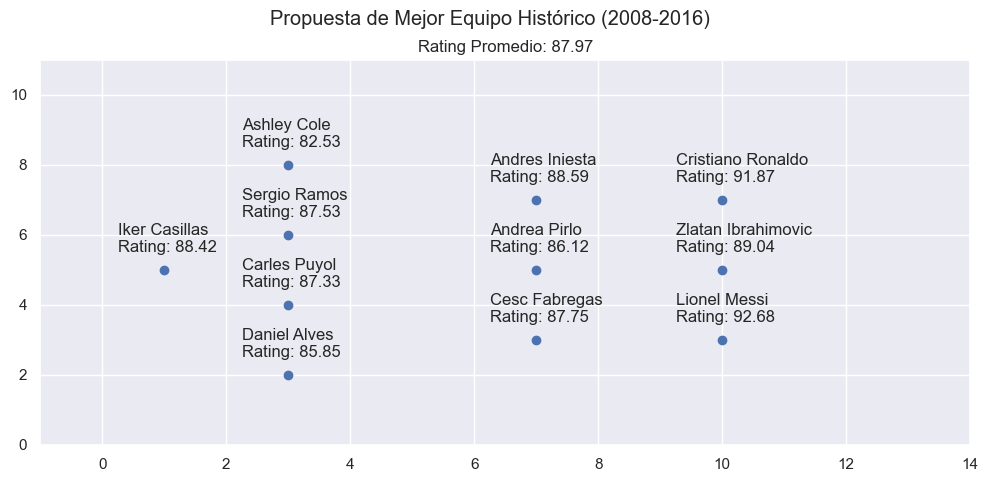

In [34]:
# Visualización del mejor Equipo
plt.figure(figsize=(12,5))
plt.scatter(df_best_team['pos_Y'], df_best_team['pos_X'])
plt.suptitle(f'Propuesta de Mejor Equipo Histórico (2008-2016)')
plt.title(f'Rating Promedio: {round(team_rating,2)}')
plt.ylim((0,11))
plt.xlim((-1,14))

for index, row in df_best_team.iterrows():
    plt.text(row['pos_Y']-0.75, row['pos_X']+1, row['name'])
    plt.text(row['pos_Y']-0.75, row['pos_X']+0.5, 'Rating: ' + str(round(row['overall_rating'],2)))
    

plt.show()

Finalmente, con un overal_rating histórico de 87.97 es el siguiente:

In [35]:
df_best_team

,position,name,overall_rating,pos_X,pos_Y
0,"(2, 3)",Daniel Alves,85.850000,2,3
1,"(5, 1)",Iker Casillas,88.417857,5,1
2,"(5, 7)",Andrea Pirlo,86.115909,5,7
3,"(3, 7)",Cesc Fabregas,87.752500,3,7
4,"(7, 7)",Andres Iniesta,88.588095,7,7
5,"(4, 3)",Carles Puyol,87.325000,4,3
6,"(5, 10)",Zlatan Ibrahimovic,89.041667,5,10
7,"(8, 3)",Ashley Cole,82.535000,8,3
8,"(3, 10)",Lionel Messi,92.683333,3,10
9,"(6, 3)",Sergio Ramos,87.533333,6,3
